# Proyek Analisis Data: [Bike Sharing Dataset ]
- **Nama:**  [Tengku Rabih Razzan]
- **Email:** [rzzrabih@gmail.com]
- **ID Dicoding:** [m331b4ky4318]

## Menentukan Pertanyaan Bisnis

- at what hour is the average bike rental the highest on 2012?
- How is the bike rental in summer 2012 compared to summer 2011 ?

Summer 2011 = 21 June 2011 - 23 September 2011
Summer 2012 = 20 June 2012 - 22 September 2012

## Import Semua Packages/Library yang Digunakan

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [8]:
df_hari = pd.read_csv("C:\\dicoding\\submission\\data\\day.csv", delimiter=",")
df_jam = pd.read_csv("C:\\dicoding\\submission\\data\\hour.csv", delimiter=",")

In [9]:
df_hari.info()
df_hari.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
df_jam.info()
df_jam.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- The data alone have 3 type of data which is int,float and object 
- The difference between both of the data is only 1 column that is hourly but that column makes the data instant 24 times more 

### Assessing Data

In [11]:
print("data duplikat dalam df hari :" ,df_hari.duplicated().sum())
df_hari.isna().sum()


data duplikat dalam df hari : 0


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
df_hari.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
print("data duplikat dalam df jam :" ,df_jam.duplicated().sum())
df_jam.isna().sum()


data duplikat dalam df jam : 0


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
df_jam.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
print(df_jam[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']].nunique()) 

season         4
yr             2
mnth          12
hr            24
holiday        2
weekday        7
workingday     2
weathersit     4
dtype: int64


In [16]:
print(df_hari[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']].nunique()) 

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64


In [17]:
def print_max_values(df, df_name):
    print(f"\nMax values in {df_name}:")
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        max_value = df[column].max()
        print(f"{column}: {max_value}")
print_max_values(df_jam, "Hourly Data (df_jam)")
print_max_values(df_hari, "Daily Data (df_hari)")


Max values in Hourly Data (df_jam):
instant: 17379
season: 4
yr: 1
mnth: 12
hr: 23
holiday: 1
weekday: 6
workingday: 1
weathersit: 4
temp: 1.0
atemp: 1.0
hum: 1.0
windspeed: 0.8507
casual: 367
registered: 886
cnt: 977

Max values in Daily Data (df_hari):
instant: 731
season: 4
yr: 1
mnth: 12
holiday: 1
weekday: 6
workingday: 1
weathersit: 3
temp: 0.861667
atemp: 0.840896
hum: 0.9725
windspeed: 0.507463
casual: 3410
registered: 6946
cnt: 8714


**Insight:**
- xxx
- xxx

### Cleaning Data

In [18]:
df_jam.drop_duplicates(inplace=True)
df_hari.drop_duplicates(inplace=True)

In [19]:
df_jam['dteday'] = pd.to_datetime(df_jam['dteday'])
df_hari['dteday'] = pd.to_datetime(df_hari['dteday'])

In [20]:
df_hari.info()
df_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [21]:
important_columns = ['temp', 'atemp' , 'windspeed' , 'hum']
df_jam[important_columns] = df_jam[important_columns]*100

df_hari[important_columns] = df_hari[important_columns]*100

df_jam.describe()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,49.698717,47.577510,62.722884,19.009761,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,34.000000,33.330000,48.000000,10.450000,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,50.000000,48.480000,63.000000,19.400000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,66.000000,62.120000,78.000000,25.370000,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,100.000000,100.000000,100.000000,85.070000,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,19.255612,17.185022,19.292983,12.234023,49.305030,151.357286,181.387599


In [22]:
df_hari.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,49.538479,47.435399,62.789406,19.048621,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.913040,7.906960,0.000000,2.239170,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,33.708350,33.784250,52.000000,13.495000,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,49.833300,48.673300,62.666700,18.097500,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,65.541650,60.860200,73.020850,23.321450,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,86.166700,84.089600,97.250000,50.746300,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,18.305100,16.296118,14.242910,7.749787,686.622488,1560.256377,1937.211452


In [23]:
max_limit = {
    'temp': 41,
    'atemp': 50,
    'hum': 100,
    'windspeed': 67
}
cut_jam = df_jam[df_jam.apply(lambda row: any(row[col] > max_limit[col] for col in max_limit), axis=1)]
cut_hari = df_hari[df_hari.apply(lambda row: any(row[col] > max_limit[col] for col in max_limit), axis=1)]

# Drop duplicate rows to count each unique row only once
unique_limit_jam = cut_jam.drop_duplicates()
unique_limit_hari = cut_hari.drop_duplicates()

# Count the number of unique exceeding rows
count_jam = len(unique_limit_jam)
count_hari = len(unique_limit_hari)

print(f'Number of unique rows exceeding the maximum thresholds: {count_jam}')
print(f'Number of unique rows exceeding the maximum thresholds: {count_hari}')

print(unique_limit_jam)
print(unique_limit_hari)


Number of unique rows exceeding the maximum thresholds: 10958
Number of unique rows exceeding the maximum thresholds: 459
       instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
12          13 2011-01-01       1   0     1  12        0        6           0   
13          14 2011-01-01       1   0     1  13        0        6           0   
14          15 2011-01-01       1   0     1  14        0        6           0   
15          16 2011-01-01       1   0     1  15        0        6           0   
16          17 2011-01-01       1   0     1  16        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17085    17086 2012-12-19       4   1    12  16        0        3           1   
17117    17118 2012-12-21       1   1    12   0        0        5           1   
17118    17119 2012-12-21       1   1    12   1        0        5           1   
17119    17120 2012-12-21       1   1    12   2        0        5   

In [24]:
print(unique_limit_hari.sample(5))
print(unique_limit_jam.sample(5))

     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
567      568 2012-07-21       3   1     7        0        6           0   
296      297 2011-10-24       4   0    10        0        1           1   
473      474 2012-04-18       2   1     4        0        3           1   
601      602 2012-08-24       3   1     8        0        5           1   
214      215 2011-08-03       3   0     8        0        3           1   

     weathersit     temp    atemp      hum  windspeed  casual  registered  \
567           3  59.5833  54.9912  86.5417   21.33000    1264        3195   
296           1  46.3333  45.7067  77.2083   11.87920     699        3488   
473           2  46.3333  45.7038  56.9167   16.79120     347        4020   
601           2  70.2500  64.7100  61.5000    7.21458    1325        6257   
214           2  73.1667  67.9937  65.7500   13.55830     467        3107   

      cnt  
567  4459  
296  4187  
473  4367  
601  7582  
214  3574  
       instant

In [25]:
for col, threshold in max_limit.items():
    df_jam[col] = df_jam[col].clip(upper=threshold)
    df_hari[col] = df_hari[col].clip(upper=threshold)

In [26]:
df_hari.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,36.775067,41.686114,62.789406,19.048621,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.913040,7.906960,0.000000,2.239170,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,33.708350,33.784250,52.000000,13.495000,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,41.000000,48.673300,62.666700,18.097500,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,41.000000,50.000000,73.020850,23.321450,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,41.000000,50.000000,97.250000,50.746300,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.036372,10.446589,14.242910,7.749787,686.622488,1560.256377,1937.211452


In [27]:
df_jam.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,36.514299,41.523036,62.722884,19.002662,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,34.000000,33.330000,48.000000,10.450000,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,41.000000,48.480000,63.000000,19.400000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,41.000000,50.000000,78.000000,25.370000,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,50.000000,100.000000,67.000000,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.549458,10.924624,19.292983,12.202407,49.305030,151.357286,181.387599


**Insight:**
- The data doesnt have any null,duplicate or missing value 
- The Temp,atemp,hum,windspeed data type that was using float is better using int where i changed it by multiplying to 100 
- there was a lot of column where the atemp and temp doesnt make sense and was more than the max value in readme.txt so i had to clip it to just put it on the max value given since there was 10958 on df_jam and 459 on df_hari,the data was too precious to drop

## Exploratory Data Analysis (EDA)

### Explore ...

In [28]:
# Filtering data for 2012
df_2012 = df_jam[df_jam['yr'] == 1]

# Average rental per hour on 2012
avg_2012 = df_2012.groupby('hr')['cnt'].mean()
sum_2012 = avg_2012.sum()
# Finding out which hour and how many bike rental is max on 2012
max_hour_2012 = avg_2012.idxmax()
max_avg_rentals_2012 = avg_2012.max()

print(f"The time with highest average bike rentals in 2012 is {max_hour_2012} with {max_avg_rentals_2012:.2f} average bikes")
print(f"The average sum of bike rentals in 2012 is {sum_2012:.1f}")

The time with highest average bike rentals in 2012 is 17 with 573.23 average bikes
The average sum of bike rentals in 2012 is 5621.2


In [29]:
# Filter data for summer 2011 and summer 2012 
summer_2011 = df_hari[(df_hari['season'] == 2) & (df_hari['yr'] == 0)]
summer_2012 = df_hari[(df_hari['season'] == 2) & (df_hari['yr'] == 1)]

# counting the total rentals for summer 2011 and 2012
total_summer_2011 = summer_2011['cnt'].sum()
total_summer_2012 = summer_2012['cnt'].sum()

# Total rentals for summer 2011 and 2012
print(f"Total bike rentals in Summer 2011: {total_summer_2011}")
print(f"Total bike rentals in Summer 2012: {total_summer_2012}")
print("\n")

# Average rental perday in summer 2011 and 2012
avg_summer_2011 = summer_2011['cnt'].mean()
avg_summer_2012 = summer_2012['cnt'].mean()
''
print(f"Average bike rentals per day in Summer 2011: {avg_summer_2011:.2f}")
print(f"Average bike rentals per day in Summer 2012: {avg_summer_2012:.2f}")
print("\n")

print(f"The difference of average bike rentals from 2012 to 2011 is {avg_summer_2012 - avg_summer_2011:.1f}")
print(f"The difference of Total bike rentals from 2012 to 2011 is {total_summer_2012 - total_summer_2011}")




Total bike rentals in Summer 2011: 347316
Total bike rentals in Summer 2012: 571273


Average bike rentals per day in Summer 2011: 3775.17
Average bike rentals per day in Summer 2012: 6209.49


The difference of average bike rentals from 2012 to 2011 is 2434.3
The difference of Total bike rentals from 2012 to 2011 is 223957


**Insight:**
- For the average day there was 5621 bikes being rented but the peak hour was on 17.00 which have 573 bikes rented on the average
- Total bike rentals in summer 2011 is 347316 with average bike rented per day is 3775 while total bike rentals in summer 2012 571273 with average bike rented perday in 2012 is 6210

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\Axioo Pongo\AppData\Local\Temp\ipykernel_6648\4229314832.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_2012.index, y=avg_2012.values, palette="viridis")


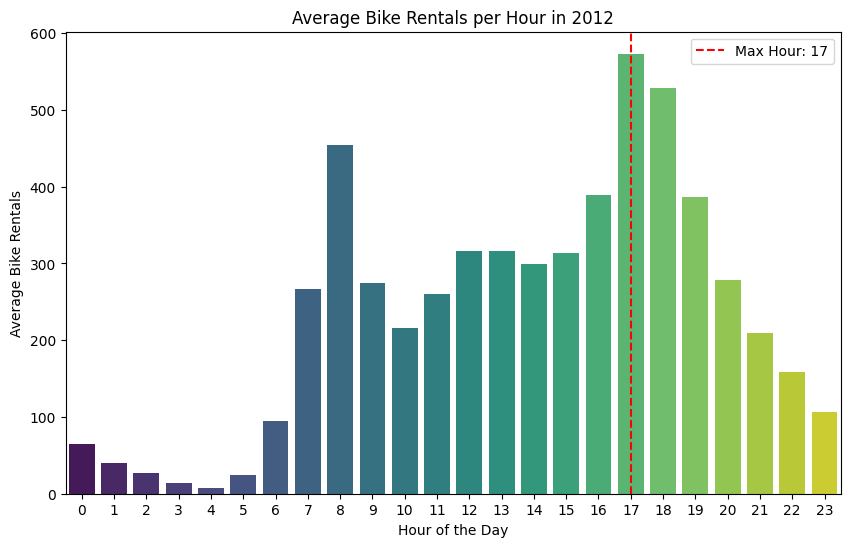

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_2012.index, y=avg_2012.values, palette="viridis")
plt.axvline(x=max_hour_2012, color='red', linestyle='--', label=f'Max Hour: {max_hour_2012}')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Rentals per Hour in 2012')
plt.legend()
plt.show()



Correlation Matrix:
               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.940445  0.000381  -0.035175  0.317079
atemp      0.940445  1.000000  0.021521  -0.110673  0.343399
hum        0.000381  0.021521  1.000000  -0.321958 -0.344065
windspeed -0.035175 -0.110673 -0.321958   1.000000  0.111405
cnt        0.317079  0.343399 -0.344065   0.111405  1.000000


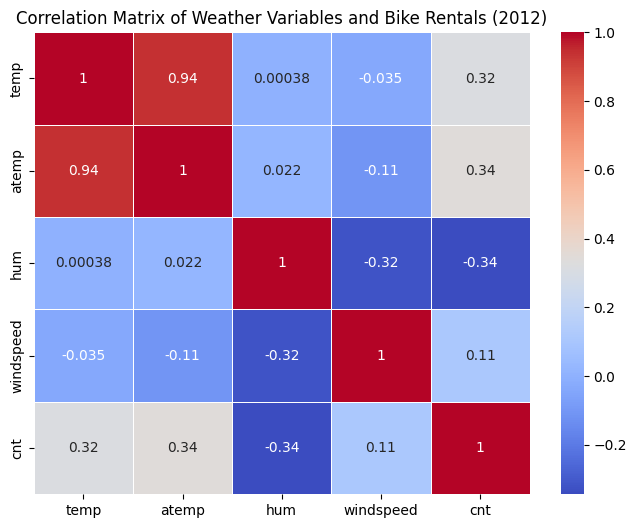

In [31]:
interesting = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation_matrix = df_2012[interesting].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Weather Variables and Bike Rentals (2012)")
plt.show()

### Pertanyaan 2:

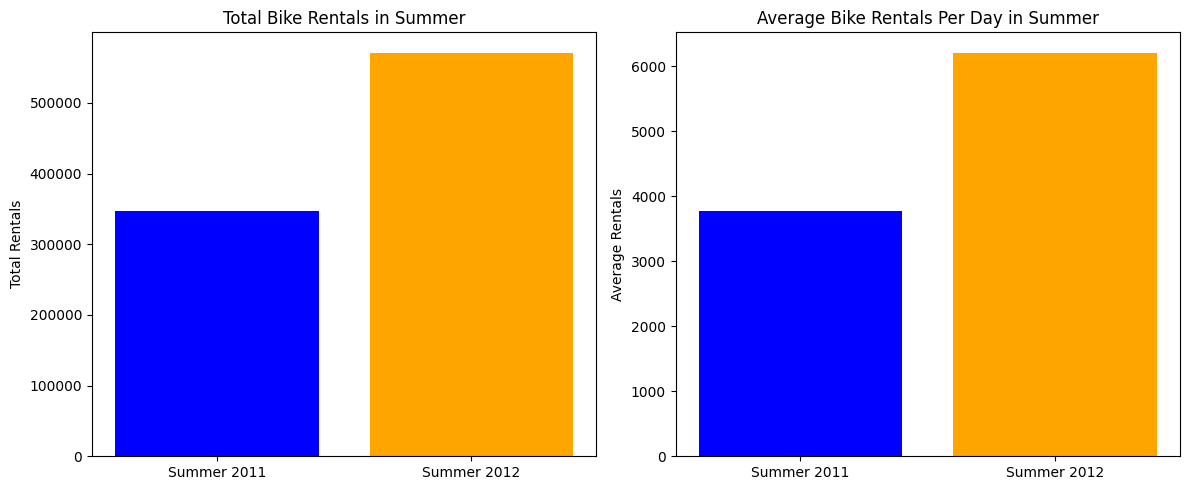

In [32]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].bar(['Summer 2011', 'Summer 2012'], [total_summer_2011, total_summer_2012], color=['blue', 'orange'])
axes[0].set_title('Total Bike Rentals in Summer')
axes[0].set_ylabel('Total Rentals')
axes[1].bar(['Summer 2011', 'Summer 2012'], [avg_summer_2011, avg_summer_2012], color=['blue', 'orange'])
axes[1].set_title('Average Bike Rentals Per Day in Summer')
axes[1].set_ylabel('Average Rentals')
plt.tight_layout()
plt.show()


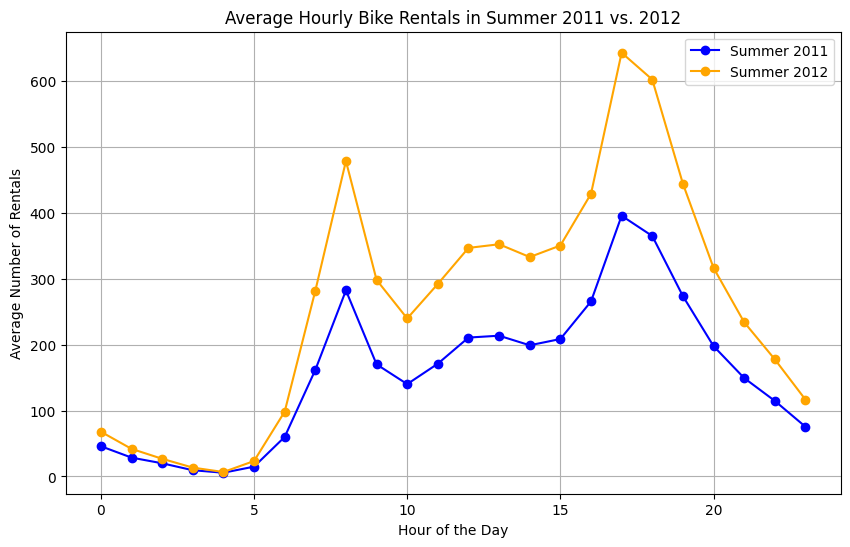

In [33]:
summer_jam_2011 = df_jam[(df_jam['season'] == 2) & (df_jam['yr'] == 0)]
summer_jam_2012 = df_jam[(df_jam['season'] == 2) & (df_jam['yr'] == 1)]


summer_hourly_2011 = summer_jam_2011.groupby('hr')['cnt'].mean()
summer_hourly_2012 = summer_jam_2012.groupby('hr')['cnt'].mean()
plt.figure(figsize=(10, 6))
plt.plot(summer_hourly_2011.index, summer_hourly_2011.values, label='Summer 2011', color='blue', marker='o')
plt.plot(summer_hourly_2012.index, summer_hourly_2012.values, label='Summer 2012', color='orange', marker='o')
plt.title('Average Hourly Bike Rentals in Summer 2011 vs. 2012')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Rentals')
plt.legend()
plt.grid(True)
plt.show()


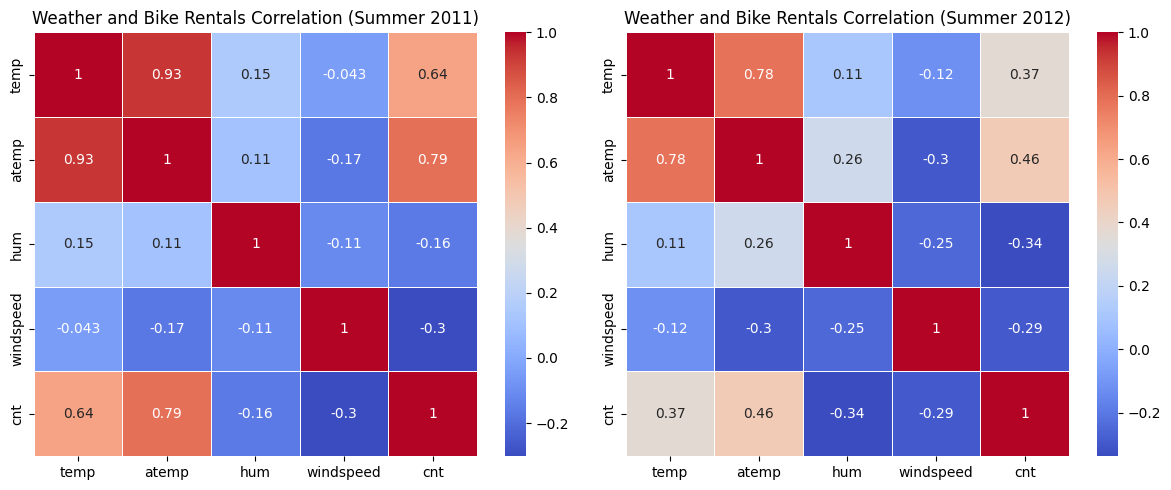

In [34]:
corr_summer_2011 = summer_2011[interesting].corr()
corr_summer_2012 = summer_2012[interesting].corr()

# Heatmap for Summer 2011
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(corr_summer_2011, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Weather and Bike Rentals Correlation (Summer 2011)")

#Heatmap for Summer 2012
plt.subplot(1, 2, 2)
sns.heatmap(corr_summer_2012, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Weather and Bike Rentals Correlation (Summer 2012)")

plt.tight_layout()
plt.show()

**Insight:**
- Question 1 : 
    - The Rental biking industry is solid industry where the spike of rented bikes in 2012 is at the hour of 8.00 and 17.00 which we can conclude is from getting to work working and off work bicycleing after work where it is cheaper to do it that way and healthier
    - The correlation of rented bikes and Temperature is not implied where it is only 0.32 so its can be concluded its more to the time of renting
- Question 2:
    - There was a jump of average bike rental per day in the summer of 2011 to 2012 where it is 2434.3 more
    - The correlation of rented bikes on 2011 is heavily implied on the atemp and temp where it is 79% and 64% where as it is less in 2012 where it is only 46% and 37%

## Analisis Lanjutan (Opsional)

In [37]:
avg_2012 = df_jam[df_jam['yr'] == 1].groupby('hr')['cnt'].mean().reset_index()
avg_2012.to_csv("avg_rentals_2012_hourly.csv", index=False)

summer_hari_2011 = df_hari[(df_hari['season'] == 2) & (df_hari['yr'] == 0)]
summer_hari_2012 = df_hari[(df_hari['season'] == 2) & (df_hari['yr'] == 1)]

summer_hari_2011.to_csv("summer_hari_2011.csv", index=False)
summer_hari_2012.to_csv("summer_hari_2012.csv", index=False)

summer_jam_2011 = df_jam[(df_jam['season'] == 2) & (df_jam['yr'] == 0)]
summer_jam_2012 = df_jam[(df_jam['season'] == 2) & (df_jam['yr'] == 1)]

summer_jam_2011.to_csv("summer_jam_2011.csv", index=False)
summer_jam_2012.to_csv("summer_jam_2012.csv", index=False)

In [36]:
summer_jam_2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2203 entries, 1807 to 4009
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     2203 non-null   int64         
 1   dteday      2203 non-null   datetime64[ns]
 2   season      2203 non-null   int64         
 3   yr          2203 non-null   int64         
 4   mnth        2203 non-null   int64         
 5   hr          2203 non-null   int64         
 6   holiday     2203 non-null   int64         
 7   weekday     2203 non-null   int64         
 8   workingday  2203 non-null   int64         
 9   weathersit  2203 non-null   int64         
 10  temp        2203 non-null   float64       
 11  atemp       2203 non-null   float64       
 12  hum         2203 non-null   float64       
 13  windspeed   2203 non-null   float64       
 14  casual      2203 non-null   int64         
 15  registered  2203 non-null   int64         
 16  cnt         2203 non-null 

In [38]:
pip freeze requirements.txt

absl-py==2.1.0
altair==5.4.1
anyio==4.6.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asgiref==3.8.1
asttokens==2.4.1
astunparse==1.6.3
async-lru==2.0.4
attrs==24.2.0
babel==2.16.0
beautifulsoup4==4.12.3
bleach==6.1.0
blinker==1.6.3
cachetools==5.5.0
certifi==2024.2.2
cffi==1.17.1
charset-normalizer==3.3.2
click==8.1.7
colorama==0.4.6
comm==0.2.2
contourpy==1.2.1
crispy-bootstrap4==2024.1
cycler==0.12.1
debugpy==1.8.1
decorator==5.1.1
defusedxml==0.7.1
distlib==0.3.8
Django==5.0.4
django-crispy-forms==2.1
executing==2.0.1
fastjsonschema==2.20.0
filelock==3.13.1
Flask==3.0.0
flatbuffers==24.3.25
fonttools==4.52.4
fqdn==1.5.1
gast==0.5.4
gitdb==4.0.11
GitPython==3.1.43
google-pasta==0.2.0
grpcio==1.64.1
gurobipy==11.0.0
h11==0.14.0
h5py==3.11.0
httpcore==1.0.5
httpx==0.27.2
idna==3.7
imbalanced-learn==0.12.3
imblearn==0.0
ipykernel==6.29.4
ipython==8.24.0
ipywidgets==8.1.5
isoduration==20.11.0
itsdangerous==2.1.2
jedi==0.19.1
Jinja2==3.1.2
joblib==1.3.2
json5==0.9.25
js

## Conclusion

- Conclution pertanyaan 1 : The highest hour of rented bike everyday is at 17.00 
- Conclution pertanyaan 2 : The bike rental on summer 2012 is 223957 more than in 2011 